In [27]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
#Load and read data
sna_data = pd.read_csv('Social_Network_Ads.csv')
sna_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [29]:
#Create X matrix of features & y target vector
X = sna_data.iloc[:, [2,3]].values
y = sna_data.iloc[:, 4].values

In [30]:
#Confirm That X is a matrix and y is a vector 
print('X-matrix :', X.shape)
print('y-vector :', y.shape)

X-matrix : (400, 2)
y-vector : (400,)


In [31]:
#Splitting Dataset Into Training & Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)

In [32]:
#Feature Scaling 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [33]:
#Fitting Naive Bayes to training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
#Make Predictions
y_pred = classifier.predict(X_test)

In [35]:
#Comparing Actual Observations with Predicted results - first 20 rows
data = pd.DataFrame({'Actual Observation': y_test.flatten(), 'Predicted Results': y_pred.flatten()})
data.head(10)

,Actual Observation,Predicted Results
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


In [36]:
#Create Confusion Matrix
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[65,  3],
       [ 7, 25]], dtype=int64)

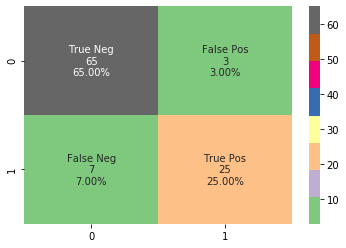

In [37]:
#Visualize The Confusion Matrix Using a heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]

labels = [f'{value_1}\n{value_2}\n{value_3}' for value_1, value_2, value_3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot= labels, fmt='', cmap='Accent')

In [38]:
# Model Accuracy, how often is the classifier correct?
per = '%'
acc = metrics.accuracy_score(y_test, y_pred)  * 100
print(f'Our Model accuracy is {acc} {per}.')

Our Model accuracy is 90.0 %.
